# Gradient Descent

## Introduction

We will be implementing logistic regression using the gradient descent algorithm.

#### References:
* [Andrew Ng's Machine Learning Lecture Notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf)

#### Notes on Implementing Gradient Descent:
* Implementing gradient descent can lead to challenging debugging. Make sure you implement your algorithm using very simple pieces (functions or methods) which you then combine into the full algorithm.  This allows you to check the correctness of the individual functions, which makes mistakes easier to track down. You may also try computing values by hand for a really simple example (1 feature, 2 data points) and make sure that your methods are getting the same values.
* Numpy is your friend. Use the power of it! There should only be one loop in
your code (in `fit`). You should never have to loop over a numpy array. See the
numpy [tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) and
[documentation](http://docs.scipy.org/doc/).

## Basic
### Part 1: Create Data

1. Generate a dataset using sklearn's make_classification function.

    ```python
    X, y = make_classification(n_samples=100,
                                n_features=2,
                                n_informative=2,
                                n_redundant=0,
                                n_classes=2,
                                random_state=0)
    ```

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import src.logistic_regression_functions as lrf

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score, precision_score, recall_score
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split, KFold

# set larger font sizes and the style
np.set_printoptions(suppress=True)
font_size = 24
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams['xtick.labelsize'] = font_size-5
mpl.rcParams['ytick.labelsize'] = font_size-5
#plt.style.use('bmh')
plt.style.use('dark_background')

In [2]:
X, y = make_classification(n_samples=100,
                             n_features=2,
                             n_informative=2,
                             n_redundant=0,
                             n_classes=2,
                             random_state=0)

In [3]:
X

array([[-0.76605469,  0.18332468],
       [-0.92038325, -0.0723168 ],
       [-0.98658509, -0.28692   ],
       [ 1.70910242, -1.10453952],
       [ 1.9876467 ,  1.77624479],
       [ 3.86274219,  2.63325914],
       [-1.12836011, -0.42276158],
       [-1.10074198, -2.56042975],
       [-1.53716448,  1.10502647],
       [-0.32372692,  0.55626974],
       [-1.28532883, -1.30819171],
       [ 3.35973253, -1.79506345],
       [-1.27034986,  1.2678044 ],
       [-0.71023363, -1.13058206],
       [-1.12933108,  0.68766176],
       [ 0.24820673, -0.50979271],
       [-2.47263494, -0.48661246],
       [-1.11573423,  1.43370121],
       [-1.2141474 ,  1.97698901],
       [-1.25860859, -0.18289652],
       [-0.53583409,  1.10698637],
       [ 0.92328145, -1.30813451],
       [ 2.02751248, -0.4032571 ],
       [ 2.1871814 ,  2.03196825],
       [ 0.51281456,  0.43299453],
       [-2.8118071 , -0.34553805],
       [ 0.31338067,  1.12073484],
       [ 0.27299061, -0.32110537],
       [-1.18986266,

2. We use two features so that we can visualize our data. Make a scatterplot with the first feature on the horizontal axis and the second on the vertical axis. Depict the two categories using different colors or different symbols.

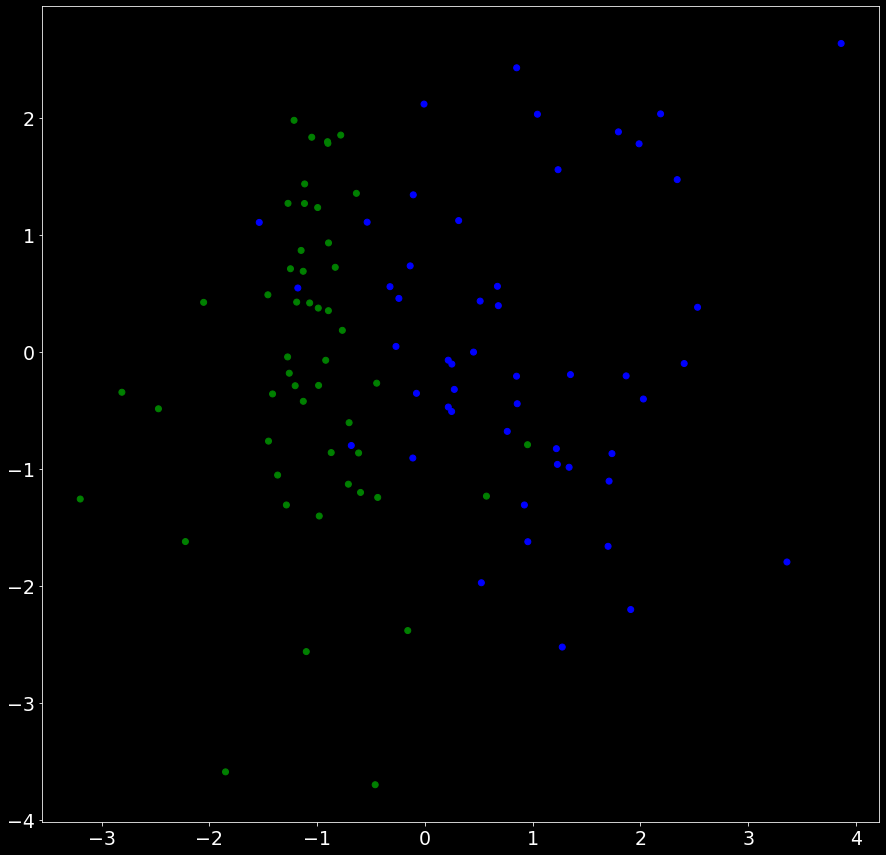

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

colors = ['blue' if y_i==1 else 'green' for y_i in y]

ax.scatter(X[:, 0], X[:,1], c=colors);

3. Just by eye-balling, make an estimate for a decision boundary of the form `x_2 = m*x_1 + b`. (Note that we haven't fit a logistic regression to this yet, but if we did, the line of constant `p=0.5` has `m = -beta_1 / beta_2` and `b = -beta_0 / beta_2`.)

In [5]:
#x_2 = m*x_1 + b
#m = 10

#b = -1

### Part 2: Cost function

In order to be able to evaluate if our gradient descent algorithm is working
correctly, we will need to be able to calculate the cost.

Recall the log likelihood function for logistic regression. Our goal is to *maximize* this value.

![Cost Function](images/likelihood.png)
<!--
\ell(\boldsymbol\beta) = \sum_{i=1}^{n} y_i \log ( h(\mathbf{x_i}) ) + (1-y_i) \log (1 - h(\mathbf{x_i}))
-->

Recall that the hypothesis function *h* is defined as follows:

![hypothesis](images/hypothesis.png)
<!--
h(\mathbf{x_i}) = \frac{1}{1+e^{-\boldsymbol\beta\mathbf{x_i}}}
-->

Since we will be implementing Gradient *Descent*, which *minimizes* a function, we'll look at the cost function below, which is just the negation of the log likelihood function above.

![cost function](images/cost.png)
<!--
J(\boldsymbol\beta) = - \sum_{i=1}^{n} y_i \log ( h(\mathbf{x_i}) ) + (1-y_i) \log (1 - h(\mathbf{x_i}))
-->

The gradient of the cost function is as follows:

![gradient](images/gradient.png)
<!--
\nabla J(\boldsymbol\beta) =
\left[
\frac\partial{\partial\beta_1}J(\boldsymbol\beta),
\frac\partial{\partial\beta_2}J(\boldsymbol\beta),
\ldots,
\frac\partial{\partial\beta_p}J(\boldsymbol\beta)
\right]
-->

Each partial derivative will be computed as follows (for `j >= 1`):

![partial](images/partial.png)
<!--
\frac\partial{\partial\beta_j}J(\boldsymbol\beta) =
\sum_{i=1}^n \left( h(\mathbf{x_i}) - y_i \right ) x_{ij}
-->

1. To verify that your implementations are correct, compute the following _by hand_. Of course, you can use a calculator/google/wolfram alpha/python.


    |                   | feature 1 | feature 2 |   y |
    | ----------------- | --------: | --------: | --: |
    | **x<sub>1</sub>** |         0 |         1 |   1 |
    | **x<sub>2</sub>** |         2 |         2 |   0 |
    | **x<sub>3</sub>** |         3 |         0 |   0 |  
    


    1. Using the data above, compute the **value of the cost function**. Initialize your coefficients: β<sub>1</sub> =1, β<sub>2</sub> =1. For now, assume β<sub>0</sub>=0 (that is, we are not considering an intercept term).
    
        Hint: you will use
        (β<sub>1</sub>x<sub>1,1</sub> + β<sub>2</sub>x<sub>1,2</sub>)
        while computing your hypothesis function for the first data point.
    
    2. Using the data above, compute the **gradient of the cost function**.

In [6]:
def h(b1, b2, x1, x2):
    value = 1 / (1 + np.exp(-(b1*x1 + b2*x2)))
    #print(f'h({x1}, {x2}) with b1={b1}, b2={b2} is {value}')
    return value


partial_1 = (h(b1=1, b2=1, x1=0, x2=1) - 1) * 0 + (h(b1=1, b2=1, x1=2, x2=2) - 0) * 2 +(h(b1=1, b2=1, x1=3, x2=0) - 0) * 3

partial_2 = (h(b1=1, b2=1, x1=0, x2=1) - 1) * 1 + (h(b1=1, b2=1, x1=2, x2=2) - 0) * 2 +(h(b1=1, b2=1, x1=3, x2=0) - 0) * 0

h_1 = h(b1=1, b2=1, x1=0, x2=1)
h_2 = h(b1=1, b2=1, x1=2, x2=2)
h_3 = h(b1=1, b2=1, x1=3, x2=0)

print(f'h_1:{h_1}, h_2:{h_2}, h_3:{h_3}')

print(partial_1, partial_2)
    

h_1:0.7310585786300049, h_2:0.9820137900379085, h_3:0.9525741268224334
4.8217499605431176 1.6950861587058217


2. In `logistic_regression_functions.py`, implement `predict_proba` and `predict` functions. `predict_proba` will calculate the result of `h(x)` for the given coefficients. This returns float values between 0 and 1, which should be interpreted as conditional probabilities. `predict` will round these values so that you get a prediction of either 0 or 1. An optional argument is provided for the threshold, which is defaulted to `0.5`.  **Note:** The names of these functions were chosen to align with `sklearn`'s conventions.

In [7]:
X_sample = np.array([[0, 1], [2, 2], [3, 0]])
y_sample = np.array([1, 0, 0])
coeffs = np.array([1, -0.5])


p = lrf.predict_proba(X_sample, coeffs)
y_hat = lrf.predict(X_sample, coeffs)
#cost = lrf.cost(X_sample, y_sample, coeffs)
#grad = lrf.gradient(X_sample, y_sample, coeffs)

print("The predicted probability vector is {}".format(str(p)))
print("The predicted class vector is {}".format(str(y_hat)))
# print("The cost function at these coefficients is {}".format(str(cost)))
# print("The gradient of the cost is {}".format(str(grad)))

The predicted probability vector is [0.3775406687981454, 0.7310585786300049, 0.9525741268224334]
The predicted class vector is [0, 1, 1]


3. In `logistic_regression_functions.py`, implement `cost` and `gradient`. You should be able to use the `predict_proba` function you implemented above. Make sure to check that you get the same values as you computed above.

    In a terminal, you should be able to run your function like this:

    ```python
    import logistic_regression_functions as f
    import numpy as np
    X = np.array([[0, 1], [2, 2], [3, 0]])
    y = np.array([1, 0, 0])
    coeffs = np.array([1, 1])
    f.cost(X, y, coeffs)
    ```

    Make sure to do `reload(f)` if you make changes to your code.

### Part 3: Implement Gradient Descent

Now we are going to implement gradient descent, an algorithm for solving
optimization problems.

Below is psuedocode for the gradient descent algorithm. This is a generic
algorithm that can solve many convex optimization problems (of which logistic regression is an example).
In our case, the β we are solving for is the coefficient vector in logistic regression.

In this pseudocode, and in our implementation, we will stop after a given number
of iterations. A more common approach is to stop once the incremental
improvement in the optimization function is sufficiently small, while still terminating after a fixed number of iterations so as not to create an infinite loop if things go badly during the optimization.

    Gradient Descent:
        input: J: differential function (optimization function)
               α: learning rate
               k: number of iterations
        output: local maximum of optimization function J

        initialize β (often as all 0's)
        repeat for k iterations:
            β <- β - α * gradient(J)

You are going to be completing the code stub in `GradientDescent.py`.

1. Start by taking a look at the starter code. Note how the `GradientDescent` object is initialized. It takes a cost function and a gradient function. We will pass it the functions that we wrote above. Here's example code of how we'll be able to run the Gradient Descent code once you've completed all the functions.

    ```python
    import logistic_regression_functions as f
    from GradientDescent import GradientDescent

    gd = GradientDescent(f.cost, f.gradient, f.predict)
    gd.fit(X, y)
    print("coeffs:", gd.coeffs)
    predictions = gd.predict(X)
    ```

2. Implement the `fit` method. Follow the pseudocode from above.

3. Implement the `predict` method. It should just call the `predict_func` function that was taken as a parameter.

    This will be a kind of boring function. But later it will get more interesting if we do any preprocessing on the data.

## Advanced

### Part 4: Run gradient descent & compare

Now we're ready to try out our gradient descent algorithm on some real data.

1. Run your version of gradient descent on the fake data you created at the beginning.

    **Note:** If you're having trouble getting it to converge, run it for just
    a few iterations and print out the cost at each iteration. The value should
    be going down. If it isn't, you might need to decrease your learning rate.
    And of course check your implementation to make sure it's correct. You can
    also try printing out the cost every 100 iterations if you want to run it
    longer and not get an insane amount of printing.

2. Do you get a similar decision boundary to your eyeballed guess?

3. Run sklearn's `LogisticRegression` on the fake data and see if you get the same results.

### Part 5: Add Intercept

Ideally we would like to also have an intercept. In the one feature case, our equation
should look like this: `y = mx + b` (not just `y = mx`). We solve this by adding
a column of ones to our feature matrix.

1. Implement `add_intercept` in
`logistic_regression_functions.py` and use it to modify your feature matrix
before running gradient descent.

    ```python
    def add_intercept(X):
        """Add an intercept column to a matrix X.

        Parameters
        ----------
        X: A two dimensional numpy array.

        Returns
        -------
        X: The original matrix X, but with a constant column of 1's appended.
        """
    ```


2. Modify the `__init__` method of `GradientDescent` so that it can take a boolean parameter `fit_intercept`:

    ```python
    def __init__(self, cost, gradient, fit_intercept=True):
        # code goes here
    ```

    If you set `fit_intercept` to be False, it should work the same way as before this modification.

3. Check that you get a similar decision boundary to the line you eyeballed.

## Extra Credit

### Part 6: Standardization

If you try running your gradient descent code on some of the data from the [logistic regression](https://github.com/GalvanizeDataScience/logistic-regression) exercises, you'll probably have issues with it converging. You can try playing around with alpha, the learning rate (one option is to decrease the learning rate at every iteration).

An easier way is to *standardize* the data: shift and scale the data so that the mean is 0 and the standard deviation
is 1. To do this, we compute the mean and standard deviation for each feature
in the data set and then update the feature matrix by subtracting the mean from each value and then dividing by the standard deviation.

1. Commit your code! Run a `git commit -m "some message"` so that if you goof
things up with your changes you don't lose your previous version.

2. Add some methods to the `GradientDescent` class to calculate the scale factors and to scale the features (if the parameter is set.)
    * **Note:** Make sure to scale before you add the intercept column. You don't want to try and scale a column of all ones.

3. Modify the `__init__` method of the `GradientDescent` class so that it can take a boolean `standardize` parameter. Add calls of the above functions to the `fit` method if `standardize` is `True`.

4. Make sure to standardize the features before you call the `cost` or `gradient` function.

    * **Note:** You should calculate mu and sigma from the *training* data and use those values of mu and sigma to scale your test data.  Applying standardization to the entire data (before a train test split) is a subtle form of data leakage, and applying independent standardization to the test data can often result in overly optimistic measures of model performance.

5. Run your code on the fake data and make sure you get the same results.

6. Try running your code on the data from [logistic regression](https://github.com/GalvanizeDataScience/logistic-regression). Does it converge?


### Part 7: Regularization

Recall that regularization helps us deal with overfitting. Let's implement L2 regularization (Ridge).

We will be adding the following term to the cost function.

![regularization](images/regularization.png)
<!--
\lambda \sum_{j=1}^p\beta_j^2
-->

1. Again, don't forget to commit first!

2. Modify your cost to include the above term. You should add an additional parameter to the cost function called `lam` which is the lambda in the regularization term.

3. Modify your gradient function to include the gradient of the above term. You should add the `lam` term here as well.

4. When you instantiate the `GradientDescent` object, you will need to use a new version of these two functions. Here's how you can create them:

    ```python
    def cost_regularized(X, y, coeffs):
        return cost(X, y, coeffs, lam=1)
    
    def gradient_regularized(X, y, coeffs):
        return gradient(X, y, coeffs, lam=1)
    ```

    Note that you won't actually need to modify your `GradientDescent` algorithm at all.


***Always commit before you start a new part! If you muck up your previously working solution, you'll want to get back to it!***

### Part 8: Termination

Instead of terminating after a fixed number of iterations, we can terminate when the incremental improvement in the cost function is sufficiently small.

1. Add a parameter `step_size` to the `fit` function. Terminate the loop once the incremental decrease in the cost function is smaller than `step_size`. Note that this means you'll have to evaluate the cost function at each iteration and compare it to the previous value of the cost function. Specify your function to rely on the step_size parameter instead of the num_iterations parameter if the step_size
is not None.

2. Figure out what a good value for the `step_size`. If it's too large, you won't make it to the optimal solution. If it's too small, it will take too long to converge.

### Part 9: Stochastic Gradient Descent

*Stochastic Gradient Descent* is a variant of the gradient descent algorithm that in practice converges faster. The difference is that at each iteration, stochastic gradient descent only uses *one* training example for its update. Here is the pseudocode. `n` here is the number of training examples.

```
Randomly shuffle examples in the training set.
Repeat until step size is sufficiently small:
    for i = 1, 2, ... n:
        β <- β - α * gradient for x_i
```

Here's the cost function for a single data point **x<sub>i</sub>**:

![stochastic cost](images/stochastic_cost.png)
<!--
J_i(\boldsymbol\beta)} = \log ( h(\mathbf{x_i}) ) + (1-y_i) \log (1 - h(\mathbf{x_i})
-->

Here is the formula for the partial derivatives that make up the gradient:

![stochastic partial](images/stochastic_partial.png)
<!--
\frac{\partial J_i(\boldsymbol\beta)}{\partial \beta_j} = \left( h(\mathbf{x_i}) - y_i \right ) x_{ij}
-->

Note that we shuffle the training examples and then go through them in order so that we use every training example before repeating.

1. Implement a `fit_stochastic` method that uses the stochastic gradient descent algorithm to fit the model.  You may have to implement alternate versions of the `cost` and `gradient` functions that accept different types for their arguments.

2. Use ipython's `timeit` to compare the runtime of the standard gradient descent algorithm and stochastic gradient descent. Also compare their results to verify that they return the same optimal coefficients.

### Part 10: Newton's Method for a single variable

While gradient descent and stochastic gradient descent are two of the most common optimization techniques, they are not the only techniques used by data scientists. Newton's Method is a root-finding algorithm. When we apply Newton's Method to the derivative of a function, we can find the roots of the derivative, which is equivalent to finding the extrema of a function.

1. Newton's Method can be used for finding the **roots of a differentiable function**. You may have learned this algorithm in your high school calculus class. Here is an overview of how the algorithm works.
    ```
    1. Provide an initial guess x0 for the location of the root.

    2. Calculate f(x0)

    3. If f(x0) is less than your pre-defined tolerance, then stop. Otherwise continue.

    4. Find the x-intercept of the line tangent to f(x) at x0.

    5. Update x0 := the x-intercept found in step 4.

    6. Return to step 2.
    ```
    
    Here is an [animation of how it works](https://en.wikipedia.org/wiki/Newton%27s_method#/media/File:NewtonIteration_Ani.gif)

    Equivalently, this iterative method uses this update formula:
 
    ![update formula](images/newtonupdate1.png)


2. Newton's Method can also be used to find **local optima of any twice-differentiable function**, such as the cost function, by approximating the zeros of a function's derivative. 

    First, we can set 

    ![update formula](images/newtonupdate3.png)

    Then, our new update formula will take the form 

    ![update formula](images/newtonupdate2.png)

    And, we continue updating until the derivative, _g(x)_, is less than our tolerance level.

    Note: if our function is quadratic, this method will find the vertex in one step.
    

3. **Exercise:**  Using Newton's Method for optimization, write a function that returns one of the local minimas of the quartic function f(x) = x<sup>4</sup> + 2x<sup>3</sup> - 5x<sup>2</sup> - 8. 

    ```python
    def newton_quartic(x0, epsilon):
    '''
        Parameters
	----------
        x0: Initial guess for x0.
	epsilon: Tolerance level for convergence.

	Returns
	-------
        optim: Cartesian coordinates of minima.
    '''
    ```